In [1]:
from tqdm import tqdm

import tensorflow as tf

from gan_images.models.generator import init_generator
from gan_images.models.discriminator import init_discriminator
from gan_images.data.data import load_real_samples, data_preprocessing
from gan_images.gan.gan import GAN

In [2]:
data = load_real_samples()

Found 70000 files belonging to 1 classes.


In [ ]:
gan = GAN()
gan.train(
    data,
    num_epochs = 3,
    mode = 'alternate'
)

instantiated GAN object
training in alternate mode
training discriminator


epoch 0


  2%|███▏                                                                                                                                                                  | 21/1094 [01:28<1:14:46,  4.18s/it]

In [3]:
import tensorflow as tf
import tensorflow.keras as K

import matplotlib.pyplot as plt

In [4]:
image_dimension = 12

noise_dim = 100

dense_dim = 10

num_filters = 18
filters_size = 5
strides = 2#int(filters_size / 2)

In [6]:
D1 = int(image_dimension/4)

dense = K.layers.Dense(
    units = (D1 ** 2) * dense_dim, # output shape 
    use_bias = False,
    input_shape = (noise_dim, )
)

reshape1 = K.layers.Reshape((D1, D1, dense_dim))

deconv1 = K.layers.Conv2DTranspose(
    filters = num_filters, # number of filters
    kernel_size = (filters_size, filters_size), #convolution window,
    strides = (strides, strides), # separation between the filters applications
    padding = 'same', # valid or same. Same padds with 0s envenly left & right
    output_padding = 1
)
# Note that the input and ouput has the form (B x rows x col x filters/channels)
# by default, i.e. if the channels_first is set to False

# BTW still don't understand why the deconv layer 

In [7]:
noise = tf.random.normal([1, noise_dim])

x1 = dense(noise)

x2 = reshape1(x1)

x3 = deconv1(x2)

In [8]:
x1.shape

TensorShape([1, 90])

In [9]:
x2.shape

TensorShape([1, 3, 3, 10])

In [10]:
x3.shape

TensorShape([1, 6, 6, 18])

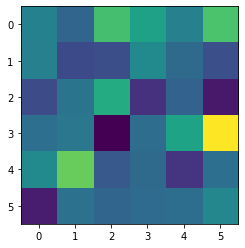

In [11]:
plt.imshow(x3[0,:,:,0])

In [19]:
SEED = 32

path

WindowsPath('../gan_images/data/thumbnails128x128')

In [80]:
path = pathlib.Path("../gan_images/data/thumbnails128x128")
real_samples = K.utils.image_dataset_from_directory(
    path,
    labels = None,
    validation_split = 0,
    seed = SEED,
    batch_size = 64,
    image_size = (128, 128)
)
normalization_layer = K.layers.Rescaling(1./256)

real_samples = real_samples.map(lambda x : normalization_layer(x))

Found 70000 files belonging to 1 classes.


In [82]:
flip = K.layers.RandomFlip(mode = 'horizontal', seed = SEED)

In [83]:
real_samples = real_samples.map(lambda x : flip(x))

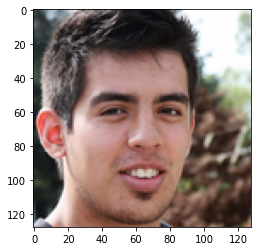

In [84]:
for b in real_samples:
    plt.imshow(b[0])
    break